In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hex_to_re_im(h:str):
    a='0123456789abcdef'
    assert len(h)==2, 'bad'
    i0=a.index(h[0])
    i1=a.index(h[1])
    b0=str(bin(i0))[2:]
    b1=str(bin(i1))[2:]
    b0='0'*(4-len(b0)) + b0
    b1='0'*(4-len(b0)) + b1
    sign0,sign1=b0[0],b1[0]
    mag0=sum([1<<idx if i=='1' else 0 for idx,i in enumerate(b0[1:][::-1])])
    mag1=sum([1<<idx if i=='1' else 0 for idx,i in enumerate(b1[1:][::-1])])
    re = mag0 if sign0=='1' else -mag0
    im = mag1 if sign1=='1' else -mag1
    return re+1.0j*im

In [3]:
[hex_to_re_im(i) for i in ('ff','00','ab','58')]

[(7+7j), 0j, (2+3j), (-5+0j)]

In [34]:
h = hexdump.split('\n')
h = [i[7:].strip() for i in h]
h = h[2:]
h[0] = h[0][30+12:]
h = [i.split() for i in h]
hexes = []
for i in h: hexes+= i
hexes

['0f',
 '00',
 '9b',
 '3e',
 '20',
 '2e',
 '21',
 '00',
 '22',
 '02',
 '01',
 '0c',
 'f0',
 '1f',
 '03',
 '0e',
 '04',
 '0f',
 '30',
 '10',
 'e0',
 'f2',
 '02',
 '1f',
 'fd',
 'f0',
 '0f',
 '01',
 '00',
 '22',
 '1d',
 '01',
 '21',
 '0f',
 '1e',
 '00',
 'fe',
 '02',
 'f1',
 '20',
 '0f',
 'f2',
 '01',
 'ef',
 'f3',
 'f2',
 '0e',
 '12',
 'e2',
 '00',
 'f2',
 '00',
 '00',
 '01',
 'd0',
 'f0',
 'e0',
 '0f',
 '2f',
 '0f',
 '12',
 '02',
 '22',
 '00',
 '0f',
 '0e',
 'f1',
 '2f',
 'f0',
 'f0',
 '10',
 '0f',
 '14',
 'e0',
 '02',
 '00',
 '1e',
 '00',
 '10',
 'ff',
 'ef',
 '0f',
 '01',
 'e2',
 'e0',
 '01',
 '0e',
 '2e',
 '00',
 'ee',
 '11',
 '0f',
 'e0',
 'f0',
 '00',
 'e2',
 '21',
 '10',
 '00',
 '0f',
 'fe',
 '01',
 '00',
 'f0',
 '0e',
 'f0',
 '20',
 '11',
 '00',
 '02',
 '00',
 'e1',
 'ee',
 '10',
 'e2',
 '00',
 '0f',
 '10',
 'fe',
 'ce',
 '00',
 'd1',
 '1f',
 'f2',
 '10',
 '11',
 '00',
 'f1',
 '0f',
 '0f',
 '01',
 '12',
 'f2',
 'ee',
 '0e',
 '02',
 '00',
 'f2',
 'ef',
 '00',
 '10',
 '20',
 '11',

In [33]:
comp = [hex_to_re_im(i) for i in hexes]
re = np.real(comp)
im = np.imag(comp)
a = [abs(i) for i in comp]

In [31]:
nbytes = len(a)
nsamp = nbytes/2 # number of samples from single pol


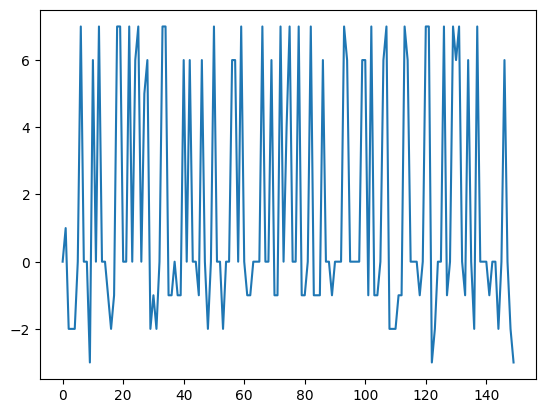

In [32]:
plt.plot(re[:300:2])
# plt.plot(im[1:300:2])

In [4]:
hexdump="""0000   e4 5f 01 17 27 de 12 34 56 78 9a bc 08 00 45 00
0010   04 d0 00 00 40 00 ff 11 70 1f c0 a8 29 0a c0 e6
0020   5c 64 10 e1 10 43 04 bc 00 00 00 62 17 f5 0f 00
0030   9b 3e 20 2e 21 00 22 02 01 0c f0 1f 03 0e 04 0f
0040   30 10 e0 f2 02 1f fd f0 0f 01 00 22 1d 01 21 0f
0050   1e 00 fe 02 f1 20 0f f2 01 ef f3 f2 0e 12 e2 00
0060   f2 00 00 01 d0 f0 e0 0f 2f 0f 12 02 22 00 0f 0e
0070   f1 2f f0 f0 10 0f 14 e0 02 00 1e 00 10 ff ef 0f
0080   01 e2 e0 01 0e 2e 00 ee 11 0f e0 f0 00 e2 21 10
0090   00 0f fe 01 00 f0 0e f0 20 11 00 02 00 e1 ee 10
00a0   e2 00 0f 10 fe ce 00 d1 1f f2 10 11 00 f1 0f 0f
00b0   01 12 f2 ee 0e 02 00 f2 ef 00 10 20 11 00 f0 01
00c0   01 13 c0 e1 fe 0e 01 1e 00 40 f0 2f 12 f0 10 0e
00d0   00 e2 f1 f0 12 ff 10 cf 1c 01 e0 00 00 f1 0e d2
00e0   10 02 00 01 01 f1 01 01 f0 f0 e1 02 00 e1 01 0f
00f0   0f 1f 0e 0e ee 00 e0 01 1f 10 f1 1f 12 11 1f 00
0100   00 0f e1 f1 f1 01 2f d1 2f 00 2f f0 10 f0 10 20
0110   f1 02 ef 00 00 10 00 12 00 10 10 12 0f 1f f0 10
0120   f1 1e 31 1f 20 10 02 fe 0f 11 ff 00 1f 00 0d ef
0130   ff ee ef 0f f0 00 00 01 10 f1 e0 0f 01 1e 21 0f
0140   fc e0 0e 00 00 10 00 f2 10 e0 00 ee 00 01 2f 00
0150   0e 0f e0 f0 00 f1 20 10 3f e0 20 ff 1e ff f2 01
0160   de 20 e0 0e 20 10 e0 ef f0 f0 f1 00 f2 11 01 10
0170   0f 00 f0 20 00 f0 10 f0 00 00 fe fe 0f 00 00 0e
0180   00 d1 1f e0 10 f2 20 e2 01 e2 20 ee 02 ff 0f 10
0190   f0 2f 00 10 00 11 03 1e 12 f3 fe 0f 10 ff 0e f2
01a0   ff 01 00 0f 0e 0e 00 f0 11 10 00 02 f1 01 01 e1
01b0   10 0f 11 0f f1 0e fe 10 0e 1e 10 0e 01 0e 3e cf
01c0   9e 40 f1 e0 03 00 e2 00 00 e1 e0 f1 22 01 02 02
01d0   e0 10 00 01 1f 02 01 ee 02 12 31 01 10 01 e2 01
01e0   ff 10 0f 00 0e 01 01 12 10 f0 02 13 00 02 00 2f
01f0   02 00 30 00 01 f1 00 1e 0e ee 00 20 0e 0f 0d 10
0200   f2 3f e0 01 01 01 04 ff f0 f0 0f 21 2f ff 00 e2
0210   0f e0 01 10 00 0f e0 f0 0f 01 0e 20 21 f2 0e 0d
0220   01 ef f0 1e 00 10 f0 f0 e0 11 12 02 00 20 0f 20
0230   03 1f 1e 1f 01 ef 02 ee e0 0e f0 f0 20 e1 e0 11
0240   00 21 00 11 01 3f 20 00 e0 1f f2 02 f0 f2 e1 f0
0250   e2 f1 ef e0 10 2f 10 0f 1e 1f 10 1e f0 e2 0e 01
0260   00 f0 00 e1 e1 10 01 fe 00 10 03 0e 10 02 f1 f2
0270   10 21 e0 20 f0 10 20 2f 0f f0 1e f1 20 e0 e2 00
0280   f2 12 0f 20 e0 02 e3 00 22 01 e1 e0 20 00 ef f0
0290   de 10 00 e1 0f 0f 1f 00 10 01 fe 00 ee f0 ef 00
02a0   02 10 fe f1 e1 01 01 e2 22 f1 20 01 ff 12 02 22
02b0   00 f2 01 00 00 00 02 1e 1f 00 fe 00 00 22 00 f1
02c0   02 0f ee 2f 20 00 00 10 02 01 01 2e 00 ff 00 00
02d0   1f 21 12 20 f0 10 11 00 10 10 00 ee 02 0f 23 10
02e0   2f 10 11 10 fe f2 00 02 f0 20 f0 1e f0 11 ef f0
02f0   02 02 2f 00 21 01 ff 1e 00 10 0f 1f 0f 1f 20 00
0300   10 e1 f1 21 21 00 2e 00 10 0f 0f 20 00 00 01 0f
0310   f0 e0 00 ff 2f ff 1d f0 ef 21 22 00 f2 f0 1f 0f
0320   11 20 11 10 f0 2f 0e 1f 00 ef 2e 00 00 00 01 fe
0330   01 00 01 df 11 fe 10 00 f0 1e 00 f2 10 21 f2 1f
0340   ff fe f0 03 10 00 00 21 01 20 10 10 11 e2 12 30
0350   92 4e 0f ee f2 12 f1 01 0f 01 03 e0 c3 20 f4 00
0360   00 ef 00 02 00 f1 f0 0f e1 11 f4 12 10 11 0e 20
0370   20 01 40 2f 10 01 20 1e 1e 00 10 21 20 ef 00 10
0380   01 01 0f 1e 20 20 e0 2f 0f 0e 02 21 00 ff 1e 0f
0390   04 30 02 2e e0 01 01 11 e0 e1 ff 12 00 00 00 10
03a0   fe ff 21 02 f0 ff e0 f0 00 e2 0e ef e0 f0 00 01
03b0   0f 01 f0 ff 0f f1 00 cf 00 ef 0e 1f 0f 10 11 f0
03c0   01 00 00 02 02 02 1f ef 1f 02 00 e1 0e 00 00 12
03d0   1f 0f 10 2d e2 0e 0e ff f0 02 00 e2 01 e2 f0 12
03e0   02 01 10 f1 11 f0 11 00 1f 2d 10 3f 00 ff 0e f0
03f0   1c 0e 00 00 f0 02 00 10 22 20 11 00 10 00 01 f0
0400   f0 01 e2 f0 01 00 2f 10 1f 01 0e f1 10 22 1e 10
0410   ff 10 0f 0e ef e1 f0 0e e2 0e e2 00 2f 11 0f 02
0420   e0 f2 01 00 2f 00 e0 f2 02 f1 01 00 0f 00 f0 0f
0430   12 10 22 00 11 10 10 fe 01 1f 1e 20 01 ff 12 00
0440   1e 00 f0 0f ff f0 00 01 20 00 12 01 e0 10 02 ef
0450   10 0f 01 01 e2 ef f0 f0 01 01 10 fd 00 01 00 00
0460   0f 02 01 e1 1f 10 00 00 02 00 fe 1f ff 00 32 00
0470   2f 10 01 00 f1 01 00 00 01 ff e1 20 00 02 fe 0f
0480   d0 11 f1 fe 11 10 00 0e 3f 10 0f 0e 01 1d ff 1e
0490   0f ee 2f 11 20 20 00 10 02 e0 02 02 01 01 00 00
04a0   00 ee 02 2e f0 2e 0e df 0e f0 02 f0 f1 10 e0 00
04b0   22 11 2d 02 ff f1 0f e1 10 00 00 12 01 0f 10 00
04c0   f1 20 f1 1f 10 ef 00 02 01 10 00 00 3f 10 00 ed
04d0   e1 f2 f0 33 ff 2e f1 0f 0e 0f 0f 00 1f 0f"""
